In [1]:
ls

sample_data/


In [2]:
pwd

'/content'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
ls

sample_data/


In [23]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/Dataset Plant Disease/fruit-dataset/fruit-dataset/train', class_mode='categorical',batch_size=24)

Found 56 images belonging to 6 classes.


In [24]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/Dataset Plant Disease/fruit-dataset/fruit-dataset/test', class_mode='categorical',batch_size=24)

Found 154 images belonging to 6 classes.


In [25]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [26]:
model=Sequential()

In [27]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [29]:
32*(3*3*3+1) 
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu'))

In [30]:
model.add(Dense(6,activation='softmax')) 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
len(x_train)

3

In [31]:
1238/24

51.583333333333336

In [32]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10) 


Epoch 1/10


InvalidArgumentError: ignored

In [33]:
model.save('fruitdata.h5')

In [34]:
import numpy as np 
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('fruitdata.h5')

In [36]:
img=image.load_img('/content/drive/MyDrive/Classroom/Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Corn_(maize)___Northern_Leaf_Blight/10b05173-08e7-4470-a581-a64898a6af88___RS_NLB 3799.JPG')

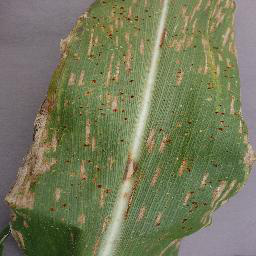

In [37]:
img

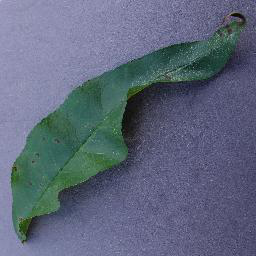

In [38]:
img=image.load_img('/content/drive/MyDrive/Classroom/Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Peach___Bacterial_spot/9a078cfa-5766-47c5-9bc0-021ba1495045___Rut._Bact.S 0790.JPG') 
img

In [39]:
x=image.img_to_array(img)

In [40]:
x

array([[[187., 186., 220.],
        [171., 170., 204.],
        [157., 156., 190.],
        ...,
        [ 68.,  66., 106.],
        [ 92.,  89., 132.],
        [ 92.,  89., 132.]],

       [[168., 167., 201.],
        [157., 156., 190.],
        [150., 149., 183.],
        ...,
        [ 69.,  67., 106.],
        [ 99.,  97., 137.],
        [ 83.,  80., 123.]],

       [[161., 160., 194.],
        [156., 155., 189.],
        [152., 151., 185.],
        ...,
        [ 96.,  94., 131.],
        [111., 109., 148.],
        [ 63.,  61., 101.]],

       ...,

       [[140., 143., 178.],
        [140., 143., 178.],
        [139., 142., 177.],
        ...,
        [ 74.,  73., 105.],
        [ 75.,  74., 106.],
        [ 72.,  71., 103.]],

       [[139., 142., 177.],
        [140., 143., 178.],
        [140., 143., 178.],
        ...,
        [ 93.,  92., 124.],
        [ 88.,  87., 119.],
        [ 79.,  78., 110.]],

       [[137., 140., 175.],
        [139., 142., 177.],
        [141., 1

In [ ]:
x=np.expand_dims(x,axis=0)

In [41]:
x

array([[[187., 186., 220.],
        [171., 170., 204.],
        [157., 156., 190.],
        ...,
        [ 68.,  66., 106.],
        [ 92.,  89., 132.],
        [ 92.,  89., 132.]],

       [[168., 167., 201.],
        [157., 156., 190.],
        [150., 149., 183.],
        ...,
        [ 69.,  67., 106.],
        [ 99.,  97., 137.],
        [ 83.,  80., 123.]],

       [[161., 160., 194.],
        [156., 155., 189.],
        [152., 151., 185.],
        ...,
        [ 96.,  94., 131.],
        [111., 109., 148.],
        [ 63.,  61., 101.]],

       ...,

       [[140., 143., 178.],
        [140., 143., 178.],
        [139., 142., 177.],
        ...,
        [ 74.,  73., 105.],
        [ 75.,  74., 106.],
        [ 72.,  71., 103.]],

       [[139., 142., 177.],
        [140., 143., 178.],
        [140., 143., 178.],
        ...,
        [ 93.,  92., 124.],
        [ 88.,  87., 119.],
        [ 79.,  78., 110.]],

       [[137., 140., 175.],
        [139., 142., 177.],
        [141., 1

In [46]:
y=np.argmax(model.predict(x),axis=1)

ValueError: ignored

In [43]:
x_train.class_indices 

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [47]:
index=['Apple__Black_rot','Apple_healthy','Corn(maize)__Northern_Leaf_Blight','Corn(maize)___healthy']

In [ ]:
index[y[0]]

In [ ]:
img=image.load_img('/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/0119205b-cfac-4322-be37-dcc401fcfa11___JR_HL 8527.JPG') 
x=image.img_to_array(img) 
x=np.expand_dims(x,axis=0) 
y=np.argmax(model.predict(x),axis=1) 
index=['Pepper,_bell_Bacterial_spot','Pepper,_bell_healthy','Potato_Early_blight','Potato_Late_blight','Potato_healthy','Tomato_Bacterial_spot','Tomato_Leaf_Mold','Tomato__Septoria_leaf_spot'] 
index[y[0]]